# Google AI Studio
This notebook is a basic example of how to use Google AI Studio in Jupyter Notebook/Python.

Let's import the necessary libraries:

In [ ]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

load_dotenv()

True

### Start by setting up a client

In [3]:
client = genai.Client(api_key=os.getenv("GOOGLE_API_KEY"))

## Generate text


In [4]:
model = "gemini-2.5-flash"

response = client.models.generate_content(
    model=model,
    contents="Tell me a joke about AI.",
)

print(response.text)

Why did the AI break up with the calculator?

Because it said, "I just don't feel a *connection* anymore!"


## Generating images
We can use Gemini 2.5 flash image preview to create images.

Here is an interior design for a restaurant. 


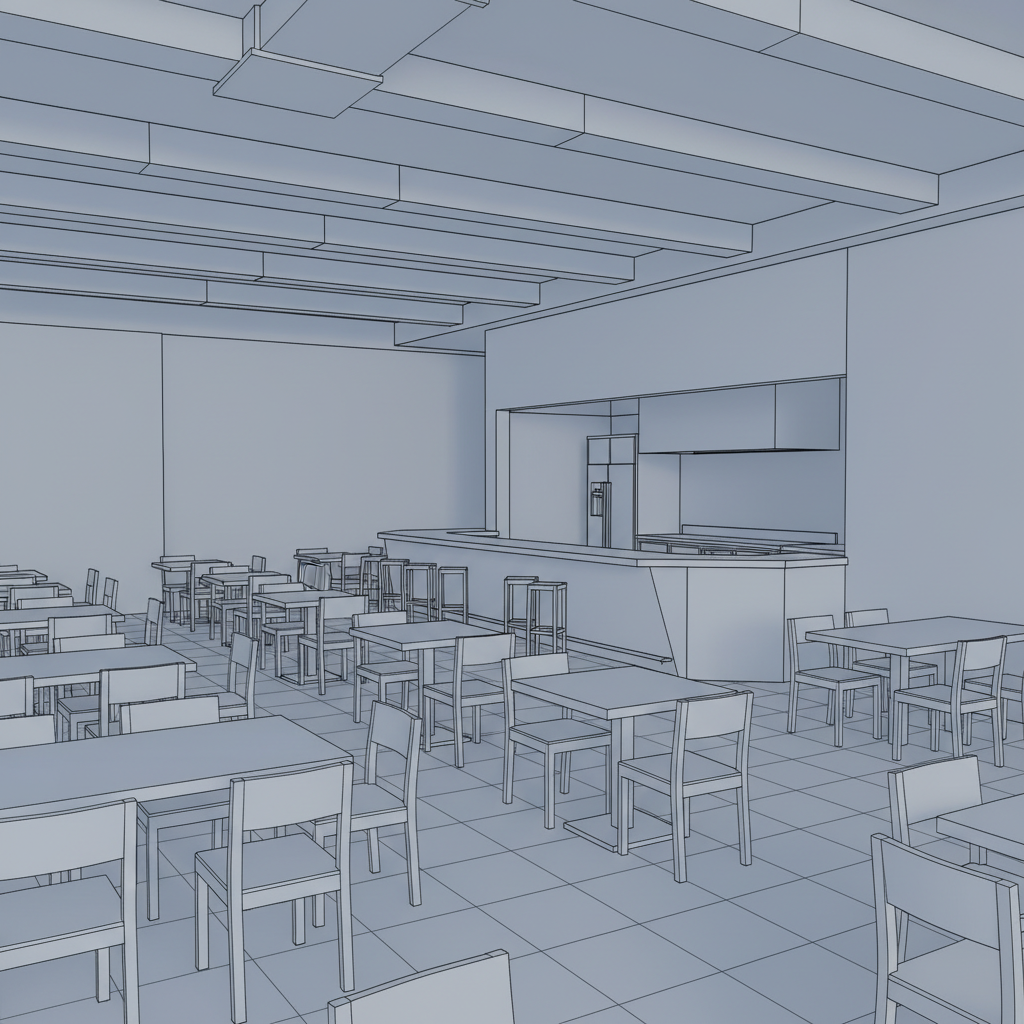

In [9]:
prompt = (
    "Made an interior design for a restaurant, Sketchup screengrab, just plain textures, viewport image, raw, no icons just room."
)

response = client.models.generate_content(
    model="gemini-2.5-flash-image-preview",
    contents=[prompt],
)

for part in response.candidates[0].content.parts:
    if part.text is not None:
        print(part.text)
    elif part.inline_data is not None:
        image = Image.open(BytesIO(part.inline_data.data))
        image.save("restaurant.png")

image

## Edit images
We can use Gemini 2.5 flash image preview to edit parts of the image while keeping the original image almost intact.

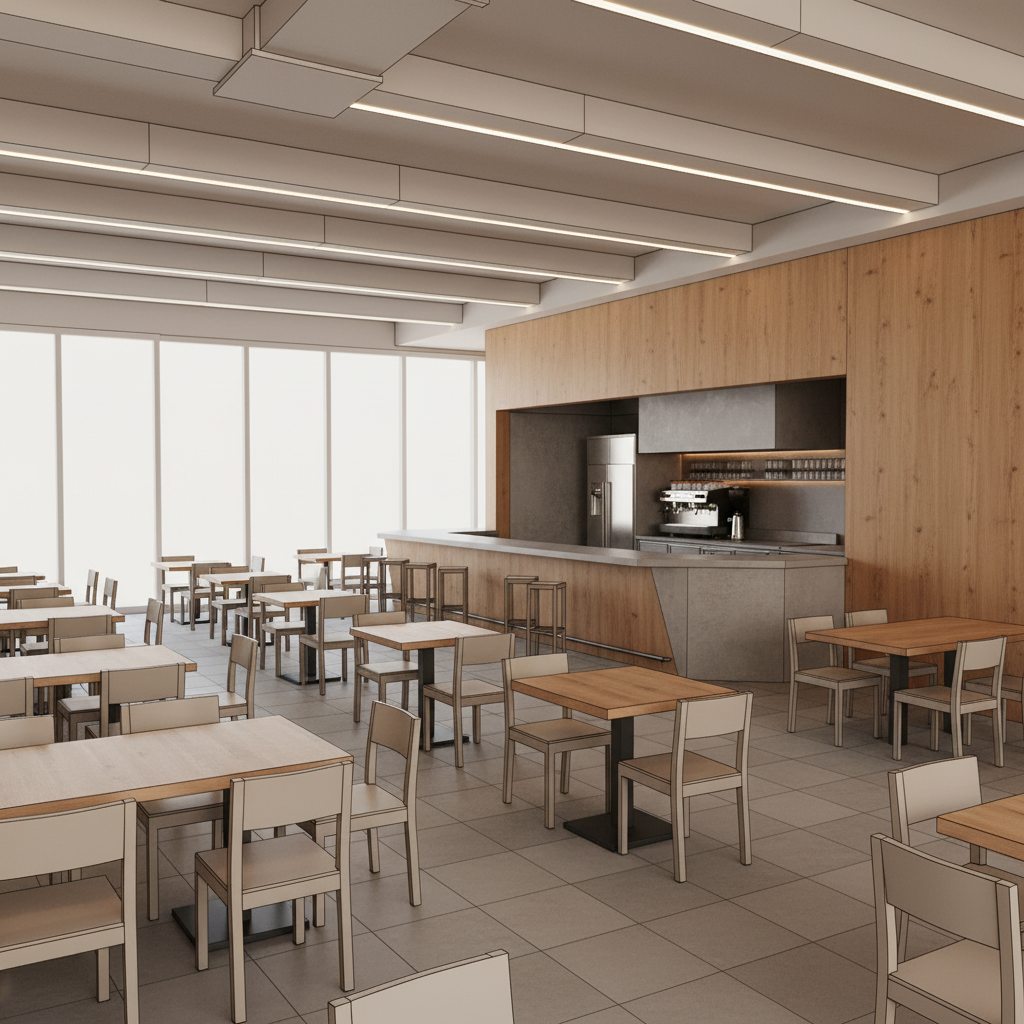

In [ ]:
prompt = (
    "Convert this to a photography from a interior architecture magazine. No text, just the image."
)

image = Image.open("restaurant.png")

response = client.models.generate_content(
    model="gemini-2.5-flash-image-preview",
    contents=[prompt, image],
)

for part in response.candidates[0].content.parts:
    if part.text is not None:
        print(part.text)
    elif part.inline_data is not None:
        image = Image.open(BytesIO(part.inline_data.data))
        image.save("restaurant_photography.png")

image

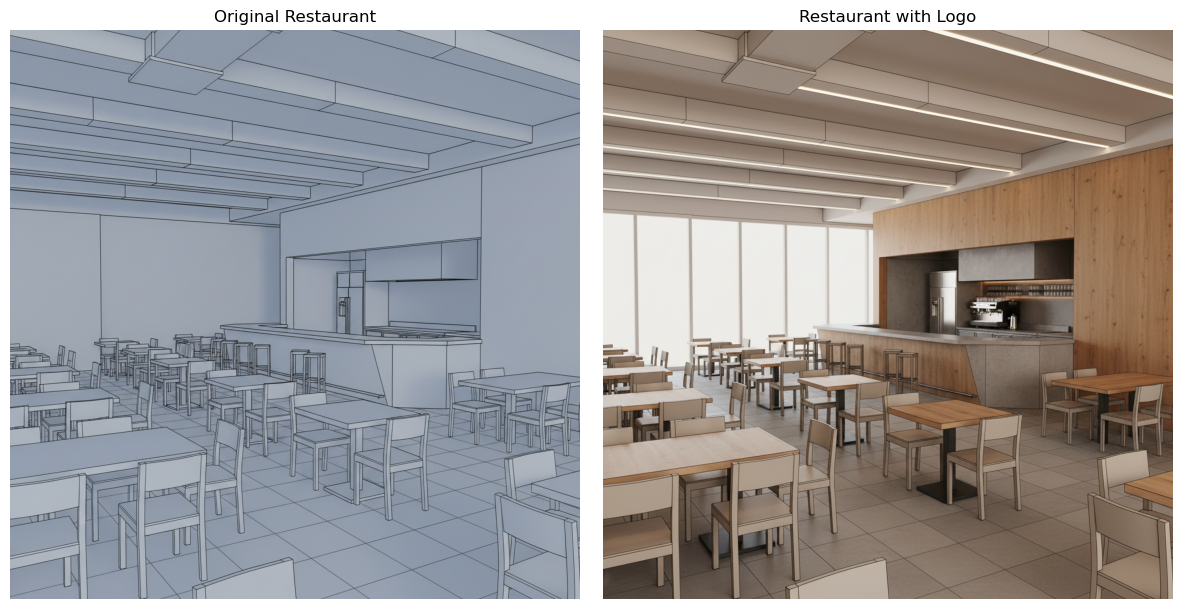

In [ ]:
def show_images_side_by_side(image_paths, titles=None, figsize=(12, 6)):
    """
    Display multiple images side by side
    
    Args:
        image_paths: List of image file paths
        titles: List of titles for each image (optional)
        figsize: Figure size as tuple (width, height)
    """
    n_images = len(image_paths)
    
    # Create subplot grid
    fig, axes = plt.subplots(1, n_images, figsize=figsize)
    
    # Handle single image case
    if n_images == 1:
        axes = [axes]
    
    for i, (img_path, ax) in enumerate(zip(image_paths, axes)):
        # Load and display image
        img = Image.open(img_path)
        ax.imshow(img)
        ax.axis('off')
        
        # Add title if provided
        if titles and i < len(titles):
            ax.set_title(titles[i])
    
    plt.tight_layout()
    plt.show()

# Example usage
image_paths = ['restaurant.png', 'restaurant_with_logo.png']
titles = ['Original Restaurant', 'Restaurant with Logo']

show_images_side_by_side(image_paths, titles)